<a href="https://colab.research.google.com/github/jerielizabeth/Workshops-DataVisualization/blob/main/Pandas_to_Aggregate_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# From https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html

In [2]:
# We are going to start with a library for data manipulation called Pandas

import pandas as pd

In [3]:
# Then we load in the data into a special table format called a dataframe

bellevue_df = pd.read_csv('https://raw.githubusercontent.com/melaniewalsh/Intro-Cultural-Analytics/master/book/data/bellevue_almshouse_modified.csv', delimiter=",")

In [5]:
bellevue_df

,date_in,first_name,last_name,age,disease,profession,gender,children
0,1847-04-17,Mary,Gallagher,28.0,recent emigrant,married,w,Child Alana 10 days
1,1847-04-08,John,Sanin (?),19.0,recent emigrant,laborer,m,Catherine 2 mo
2,1847-04-17,Anthony,Clark,60.0,recent emigrant,laborer,m,Charles Riley afed 10 days
3,1847-04-08,Lawrence,Feeney,32.0,recent emigrant,laborer,m,Child
4,1847-04-13,Henry,Joyce,21.0,recent emigrant,NaN,m,Child 1 mo
...,...,...,...,...,...,...,...,...
9579,1847-06-17,Mary,Smith,47.0,NaN,NaN,w,NaN
9580,1847-06-22,Francis,Riley,29.0,lame,superintendent,m,NaN
9581,1847-07-02,Martin,Dunn,4.0,NaN,NaN,m,NaN
9582,1847-07-08,Elizabeth,Post,32.0,NaN,NaN,w,NaN


In [6]:
# You can also get a random selection of rows

bellevue_df.sample(10)

,date_in,first_name,last_name,age,disease,profession,gender,children
8860,1846-09-04,Bridget,Gibney,36.0,NaN,spinster,w,NaN
6218,1847-08-03,Ann,Larinmore,55.0,sickness,widow,w,NaN
8052,1846-08-15,Alexander,Hamilton,8.0,NaN,NaN,m,NaN
3990,1846-08-01,John,Owens,46.0,NaN,machinist,m,NaN
5375,1847-04-07,Cornelius,McBreity,28.0,injuries,laborer,m,NaN
2465,1846-01-14,John,Connelly,29.0,NaN,laborer,m,NaN
2226,1847-05-24,Matthew,Bradley,21.0,recent emigrant,laborer,m,NaN
7084,1847-10-15,Bernard,Carr,69.0,destitution,weaver,m,NaN
9337,1846-09-07,Richard,Ruddy,32.0,NaN,laborer,m,NaN
5681,1846-04-29,Robert,Thompson,34.0,NaN,weaver,m,NaN


In [7]:
# Pandas has a number of functions for previewing our data

bellevue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9584 entries, 0 to 9583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_in     9584 non-null   object 
 1   first_name  9580 non-null   object 
 2   last_name   9584 non-null   object 
 3   age         9534 non-null   float64
 4   disease     6497 non-null   object 
 5   profession  8565 non-null   object 
 6   gender      9584 non-null   object 
 7   children    37 non-null     object 
dtypes: float64(1), object(7)
memory usage: 599.1+ KB


In [8]:
# We can also generate summary statistics

bellevue_df.describe()

,age
count,9534.000000
mean,30.332604
std,14.179608
min,0.080000
25%,21.000000
50%,28.000000
75%,39.000000
max,97.000000


In [9]:
# We can also look at all of the columns

bellevue_df.describe(include='all')

,date_in,first_name,last_name,age,disease,profession,gender,children
count,9584,9580,9584,9534.000000,6497,8565,9584,37
unique,653,523,3142,NaN,75,172,5,36
top,1847-05-24,Mary,Kelly,NaN,sickness,laborer,m,Child
freq,113,979,137,NaN,2706,3108,4958,2
mean,NaN,NaN,NaN,30.332604,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,14.179608,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.080000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN


In [10]:
# We can also isolate a particular column

bellevue_df['disease']

0       recent emigrant
1       recent emigrant
2       recent emigrant
3       recent emigrant
4       recent emigrant
             ...       
9579                NaN
9580               lame
9581                NaN
9582                NaN
9583        destitution
Name: disease, Length: 9584, dtype: object

In [11]:
# Or turn it into a dataframe of its own

bellevue_df[['disease']]

,disease
0,recent emigrant
1,recent emigrant
2,recent emigrant
3,recent emigrant
4,recent emigrant
...,...
9579,NaN
9580,lame
9581,NaN
9582,NaN


In [12]:
# Now that we have gotten familiar with pandas, let's think about how to aggregate data into something for visualization

bellevue_df['disease'].value_counts()

sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
                   ... 
orchitis              1
del femur             1
throat cut            1
ague                  1
asthma                1
Name: disease, Length: 75, dtype: int64

In [14]:
# 75 is a lot of potential options, so let's just look at the top 10

bellevue_df['disease'].value_counts()[:10]

sickness           2706
recent emigrant    1974
destitution         841
fever               192
insane              138
pregnant            134
sore                 79
intemperance         71
illegible            47
typhus               46
Name: disease, dtype: int64

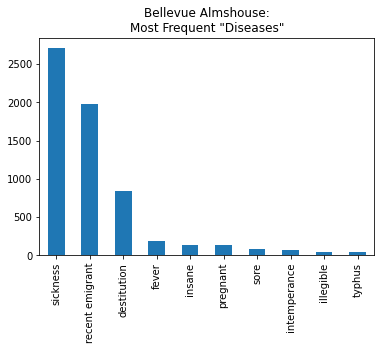

In [15]:
# Pandas has some built in visualization functions, so we can use those to get a quick exploratory glance at our data.

bellevue_df['disease'].value_counts()[:10].plot(kind='bar', title='Bellevue Almshouse:\nMost Frequent "Diseases"')



It's not pretty, but gives us a rough sketch of our distributions.

In [19]:
# We can also filter down the data by a particular variable

teachers = bellevue_df[bellevue_df['profession'] == 'teacher']

In [21]:
# And we can export the data to a CSV file

teachers.to_csv("teachers.csv", encoding='utf-8', index=False)